In [83]:
#Requird Imports

import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(0) 
import pickle 

# 2. Gradient Boosting

In [84]:
# Question 1 : Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy 
#              arrays (see python module numpy).

#Defining a function for Mean Squared Error
def Mean_Squared_Error (ground_truth,prediction):
    error = np.subtract(ground_truth,prediction)
    sq_error = np.square(error)
    Mean_Squared_Error = np.mean(sq_error)
    return np.matrix(Mean_Squared_Error)

#Mean_Squared_Error(3,5)

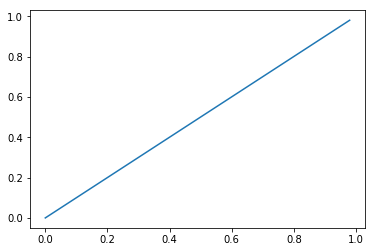

In [85]:
# Question 2 : Consider a model: y = mx + c, where the model parameter m = 1 and parameter c = 0 and x ∈ (0, 1). 
#              Plot the function using matplotlib.

def Plot(Equation, values_x):
    x = np.array(values_x)
    y = Equation(x)
    
    plt.plot(x,y)
    plt.show()
    
def Equation(x):
    m = 1
    c = 0
    return m*x + c
        
Plot(Equation, np.arange(0,1,0.02))

In [86]:
# Question 3 : Generate example data by drawing N = 100 uniform values from the range in which x lies and compute the 
#              corresponding y to get {xi, yi}N i=1. 

# Random seed helps in repeatability of the experiment
np.random.seed(0)

x = np.random.uniform(0,1,100)
x = np.matrix(x).T
y = 1 * x + 0 

print(x,y)

[[ 0.5488135 ]
 [ 0.71518937]
 [ 0.60276338]
 [ 0.54488318]
 [ 0.4236548 ]
 [ 0.64589411]
 [ 0.43758721]
 [ 0.891773  ]
 [ 0.96366276]
 [ 0.38344152]
 [ 0.79172504]
 [ 0.52889492]
 [ 0.56804456]
 [ 0.92559664]
 [ 0.07103606]
 [ 0.0871293 ]
 [ 0.0202184 ]
 [ 0.83261985]
 [ 0.77815675]
 [ 0.87001215]
 [ 0.97861834]
 [ 0.79915856]
 [ 0.46147936]
 [ 0.78052918]
 [ 0.11827443]
 [ 0.63992102]
 [ 0.14335329]
 [ 0.94466892]
 [ 0.52184832]
 [ 0.41466194]
 [ 0.26455561]
 [ 0.77423369]
 [ 0.45615033]
 [ 0.56843395]
 [ 0.0187898 ]
 [ 0.6176355 ]
 [ 0.61209572]
 [ 0.616934  ]
 [ 0.94374808]
 [ 0.6818203 ]
 [ 0.3595079 ]
 [ 0.43703195]
 [ 0.6976312 ]
 [ 0.06022547]
 [ 0.66676672]
 [ 0.67063787]
 [ 0.21038256]
 [ 0.1289263 ]
 [ 0.31542835]
 [ 0.36371077]
 [ 0.57019677]
 [ 0.43860151]
 [ 0.98837384]
 [ 0.10204481]
 [ 0.20887676]
 [ 0.16130952]
 [ 0.65310833]
 [ 0.2532916 ]
 [ 0.46631077]
 [ 0.24442559]
 [ 0.15896958]
 [ 0.11037514]
 [ 0.65632959]
 [ 0.13818295]
 [ 0.19658236]
 [ 0.36872517]
 [ 0.82099

In [87]:
# Question 4 : Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the 
#              model parameters (choose an appropriate learning rate). The loss function will be the mean squared error.

def grad_descent (x, y, reg = 1e-4, step_size = 1e-1,
                  iter = 1000,):
    
    # Taking a linear model, No hidden layers and one output node
    D = 1
    K = 1 # OUTPUT NODE

    # Initializing random parameters
    W = 0.05 * np.random.randn(D,K)
    b = np.zeros((1,K))

    Sample = x.shape[0]
    list_MSE = []
    
    #Performing batch Stochastic Gradient Descent using backpropogation
    for i in range(iter):

        # Claculating Class Scores, [N x K]
        scores = np.dot(x, W) + b 
        
        # Calculating loss
        data_loss = np.sum(Mean_Squared_Error(y, scores))
        list_MSE.append(data_loss)

        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        if i % 10 == 0:
            print ("iteration %d: loss %f" % (i,loss))

        # Calculating the gradient on scores
        dscores = -(y-scores)/Sample 

        # backpropagate the gradient to the parameters (W,b)
        dW = np.dot(x.T, dscores)
        db = np.sum(dscores, axis=0)

        dW += reg*W # regularization gradient


        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
  
    return W, b, list_MSE 

In [88]:
# Calculating grad_descent
W, b, list_MSE = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 0.343422
iteration 10: loss 0.072333
iteration 20: loss 0.047082
iteration 30: loss 0.040014
iteration 40: loss 0.034900
iteration 50: loss 0.030506
iteration 60: loss 0.026671
iteration 70: loss 0.023319
iteration 80: loss 0.020389
iteration 90: loss 0.017829
iteration 100: loss 0.015591
iteration 110: loss 0.013635
iteration 120: loss 0.011925
iteration 130: loss 0.010431
iteration 140: loss 0.009124


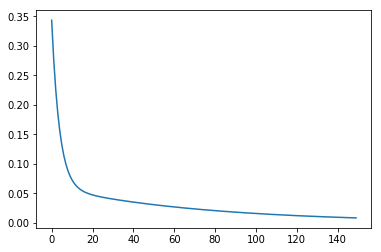

In [89]:
# Question 5 : Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning
#           rate and plot another curve on the previous plot.

# Plotting the error rate 

plt.plot(range(len(list_MSE)), list_MSE)
plt.show()

In [90]:
# Calculating grad_descent for different learning rates

W1, b1, list_MSE1 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)
W2, b2, list_MSE2 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 0.279650
iteration 10: loss 0.058905
iteration 20: loss 0.038343
iteration 30: loss 0.032589
iteration 40: loss 0.028426
iteration 50: loss 0.024848
iteration 60: loss 0.021726
iteration 70: loss 0.018997
iteration 80: loss 0.016612
iteration 90: loss 0.014527
iteration 100: loss 0.012705
iteration 110: loss 0.011112
iteration 120: loss 0.009720
iteration 130: loss 0.008503
iteration 140: loss 0.007440
iteration 0: loss 0.292538
iteration 10: loss 0.061618
iteration 20: loss 0.040109
iteration 30: loss 0.034090
iteration 40: loss 0.029734
iteration 50: loss 0.025992
iteration 60: loss 0.022725
iteration 70: loss 0.019870
iteration 80: loss 0.017375
iteration 90: loss 0.015194
iteration 100: loss 0.013288
iteration 110: loss 0.011622
iteration 120: loss 0.010166
iteration 130: loss 0.008893
iteration 140: loss 0.007780


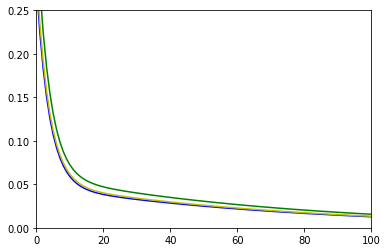

In [91]:
# Plotting the error rate for different learning rates.

plt.plot(range(len(list_MSE)), list_MSE,'g-')
plt.plot(range(len(list_MSE1)), list_MSE1,'b-')
plt.plot(range(len(list_MSE2)), list_MSE2,'y-')
plt.axis([0, 100, 0, .25])
plt.show()

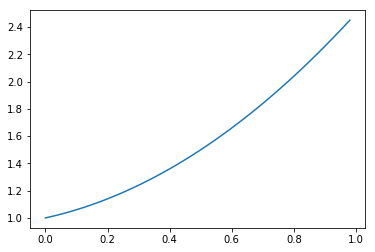

In [92]:
# Question 6 : Do steps 3-5 when the model is y = m1x + m2x^2 + c and the true parameters are m1 = 0.5, m2 = 1 and c = 1. And 
#              x ∈ (0, 1). Also, plot the ground truth function. Compare and contrast the plot with the previous one.

def Equation1(x):
    m1 = 0.5
    m2 = 1
    c = 1
    return m1*x +m2 * x**2 + c
        
Plot(Equation1, np.arange(0,1,0.02))

In [93]:
# Random seed helps in repeatability of the experiment
np.random.seed(0)

x = np.random.uniform(0,1,100)
x = np.matrix(x).T
y = 0.5 * x + 1 * np.square(x) + 1 

print(x,y)

[[ 0.5488135 ]
 [ 0.71518937]
 [ 0.60276338]
 [ 0.54488318]
 [ 0.4236548 ]
 [ 0.64589411]
 [ 0.43758721]
 [ 0.891773  ]
 [ 0.96366276]
 [ 0.38344152]
 [ 0.79172504]
 [ 0.52889492]
 [ 0.56804456]
 [ 0.92559664]
 [ 0.07103606]
 [ 0.0871293 ]
 [ 0.0202184 ]
 [ 0.83261985]
 [ 0.77815675]
 [ 0.87001215]
 [ 0.97861834]
 [ 0.79915856]
 [ 0.46147936]
 [ 0.78052918]
 [ 0.11827443]
 [ 0.63992102]
 [ 0.14335329]
 [ 0.94466892]
 [ 0.52184832]
 [ 0.41466194]
 [ 0.26455561]
 [ 0.77423369]
 [ 0.45615033]
 [ 0.56843395]
 [ 0.0187898 ]
 [ 0.6176355 ]
 [ 0.61209572]
 [ 0.616934  ]
 [ 0.94374808]
 [ 0.6818203 ]
 [ 0.3595079 ]
 [ 0.43703195]
 [ 0.6976312 ]
 [ 0.06022547]
 [ 0.66676672]
 [ 0.67063787]
 [ 0.21038256]
 [ 0.1289263 ]
 [ 0.31542835]
 [ 0.36371077]
 [ 0.57019677]
 [ 0.43860151]
 [ 0.98837384]
 [ 0.10204481]
 [ 0.20887676]
 [ 0.16130952]
 [ 0.65310833]
 [ 0.2532916 ]
 [ 0.46631077]
 [ 0.24442559]
 [ 0.15896958]
 [ 0.11037514]
 [ 0.65632959]
 [ 0.13818295]
 [ 0.19658236]
 [ 0.36872517]
 [ 0.82099

In [94]:
# Calculating grad_descent
W, b, list_MSE = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 2.665500
iteration 10: loss 0.245476
iteration 20: loss 0.067531
iteration 30: loss 0.049295
iteration 40: loss 0.043088
iteration 50: loss 0.038352
iteration 60: loss 0.034262
iteration 70: loss 0.030691
iteration 80: loss 0.027569
iteration 90: loss 0.024841
iteration 100: loss 0.022456
iteration 110: loss 0.020371
iteration 120: loss 0.018549
iteration 130: loss 0.016957
iteration 140: loss 0.015565


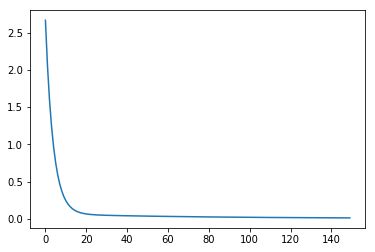

In [95]:
# Plotting the error rate 

plt.plot(range(len(list_MSE)), list_MSE)
plt.show()

In [96]:
# Calculating grad_descent for different learning rates

W1, b1, list_MSE1 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)
W2, b2, list_MSE2 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 2.489196
iteration 10: loss 0.223770
iteration 20: loss 0.057941
iteration 30: loss 0.041579
iteration 40: loss 0.036390
iteration 50: loss 0.032501
iteration 60: loss 0.029148
iteration 70: loss 0.026221
iteration 80: loss 0.023662
iteration 90: loss 0.021426
iteration 100: loss 0.019471
iteration 110: loss 0.017762
iteration 120: loss 0.016269
iteration 130: loss 0.014963
iteration 140: loss 0.013822
iteration 0: loss 2.525787
iteration 10: loss 0.228228
iteration 20: loss 0.059887
iteration 30: loss 0.043141
iteration 40: loss 0.037746
iteration 50: loss 0.033686
iteration 60: loss 0.030183
iteration 70: loss 0.027125
iteration 80: loss 0.024453
iteration 90: loss 0.022117
iteration 100: loss 0.020075
iteration 110: loss 0.018290
iteration 120: loss 0.016730
iteration 130: loss 0.015367
iteration 140: loss 0.014175


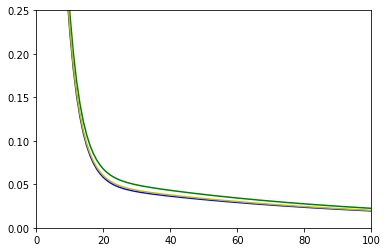

In [97]:
# Plotting the error rate for different learning rates.

plt.plot(range(len(list_MSE)), list_MSE,'g-')
plt.plot(range(len(list_MSE1)), list_MSE1,'b-')
plt.plot(range(len(list_MSE2)), list_MSE2,'y-')
plt.axis([0, 100, 0, .25])
plt.show()

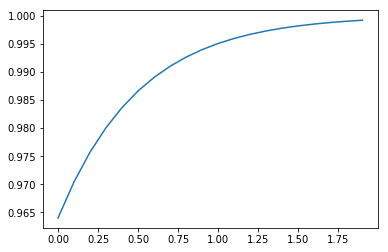

In [98]:
# Question 7 : Do steps 3-5 when the model is y = tanh(m ∗ x + c) and the true parameters are m = 1 and c = 2. And x ∈ (0, 2). 
#              Also, plot the ground truth function.

 
def Equation3(x):
    m = 1
    c = 2
    return np.tanh(m * x + c)
        
Plot(Equation3, np.arange(0,2,0.1))

In [99]:
#Draw random uniform values
np.random.seed(0) #For repeatability of the experiment
x = np.random.uniform(0,2,100)
x = np.matrix(x).T
y = np.tanh (1* x +2)
print(x,y)

[[ 1.09762701]
 [ 1.43037873]
 [ 1.20552675]
 [ 1.08976637]
 [ 0.8473096 ]
 [ 1.29178823]
 [ 0.87517442]
 [ 1.783546  ]
 [ 1.92732552]
 [ 0.76688304]
 [ 1.58345008]
 [ 1.05778984]
 [ 1.13608912]
 [ 1.85119328]
 [ 0.14207212]
 [ 0.1742586 ]
 [ 0.04043679]
 [ 1.66523969]
 [ 1.5563135 ]
 [ 1.7400243 ]
 [ 1.95723668]
 [ 1.59831713]
 [ 0.92295872]
 [ 1.56105835]
 [ 0.23654885]
 [ 1.27984204]
 [ 0.28670657]
 [ 1.88933783]
 [ 1.04369664]
 [ 0.82932388]
 [ 0.52911122]
 [ 1.54846738]
 [ 0.91230066]
 [ 1.1368679 ]
 [ 0.0375796 ]
 [ 1.23527099]
 [ 1.22419145]
 [ 1.23386799]
 [ 1.88749616]
 [ 1.3636406 ]
 [ 0.7190158 ]
 [ 0.87406391]
 [ 1.39526239]
 [ 0.12045094]
 [ 1.33353343]
 [ 1.34127574]
 [ 0.42076512]
 [ 0.2578526 ]
 [ 0.6308567 ]
 [ 0.72742154]
 [ 1.14039354]
 [ 0.87720303]
 [ 1.97674768]
 [ 0.20408962]
 [ 0.41775351]
 [ 0.32261904]
 [ 1.30621665]
 [ 0.50658321]
 [ 0.93262155]
 [ 0.48885118]
 [ 0.31793917]
 [ 0.22075028]
 [ 1.31265918]
 [ 0.2763659 ]
 [ 0.39316472]
 [ 0.73745034]
 [ 1.64198

In [100]:
# Calculating grad_descent
W, b, list_MSE = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 1.094463
iteration 10: loss 0.063966
iteration 20: loss 0.039130
iteration 30: loss 0.028218
iteration 40: loss 0.020400
iteration 50: loss 0.014750
iteration 60: loss 0.010666
iteration 70: loss 0.007714
iteration 80: loss 0.005580
iteration 90: loss 0.004038
iteration 100: loss 0.002923
iteration 110: loss 0.002117
iteration 120: loss 0.001535
iteration 130: loss 0.001114
iteration 140: loss 0.000810


In [75]:
# Calculating grad_descent for different learning rates

W1, b1, list_MSE1 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)
W2, b2, list_MSE2 = grad_descent (x, y, reg = 1e-4, step_size = 1e-1, iter = 150)

iteration 0: loss 0.898297
iteration 10: loss 0.073307
iteration 20: loss 0.047359
iteration 30: loss 0.034181
iteration 40: loss 0.024710
iteration 50: loss 0.017865
iteration 60: loss 0.012918
iteration 70: loss 0.009341
iteration 80: loss 0.006756
iteration 90: loss 0.004888
iteration 100: loss 0.003538
iteration 110: loss 0.002562
iteration 120: loss 0.001856
iteration 130: loss 0.001346
iteration 140: loss 0.000977
iteration 0: loss 0.937440
iteration 10: loss 0.071228
iteration 20: loss 0.045560
iteration 30: loss 0.032877
iteration 40: loss 0.023768
iteration 50: loss 0.017184
iteration 60: loss 0.012425
iteration 70: loss 0.008986
iteration 80: loss 0.006499
iteration 90: loss 0.004702
iteration 100: loss 0.003403
iteration 110: loss 0.002464
iteration 120: loss 0.001786
iteration 130: loss 0.001295
iteration 140: loss 0.000941


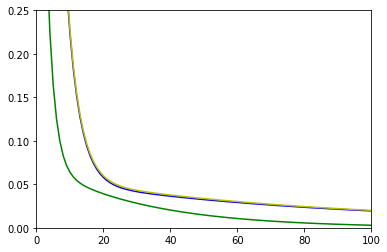

In [101]:
# Plotting the error rate for different learning rates.

plt.plot(range(len(list_MSE)), list_MSE,'g-')
plt.plot(range(len(list_MSE1)), list_MSE1,'b-')
plt.plot(range(len(list_MSE2)), list_MSE2,'y-')
plt.axis([0, 100, 0, .25])
plt.show()

In [4]:

import numpy as np
alphas = np.logspace(-4, -0.5, 30)
alphas

array([  1.00000000e-04,   1.32035178e-04,   1.74332882e-04,
         2.30180731e-04,   3.03919538e-04,   4.01280703e-04,
         5.29831691e-04,   6.99564216e-04,   9.23670857e-04,
         1.21957046e-03,   1.61026203e-03,   2.12611233e-03,
         2.80721620e-03,   3.70651291e-03,   4.89390092e-03,
         6.46167079e-03,   8.53167852e-03,   1.12648169e-02,
         1.48735211e-02,   1.96382800e-02,   2.59294380e-02,
         3.42359796e-02,   4.52035366e-02,   5.96845700e-02,
         7.88046282e-02,   1.04049831e-01,   1.37382380e-01,
         1.81393069e-01,   2.39502662e-01,   3.16227766e-01])